In [7]:
import matplotlib.pyplot as plt
from simtk.openmm import app
from simtk import openmm, unit
from openeye import oechem
from sys import stdout
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import sys
import string
from rdkit import Chem
import lxml.etree as etree

from simtk.openmm.app import element as elem
from simtk.openmm.app import Topology

import os
import math
import copy
import re
import numpy
import random

from simtk import openmm, unit

import time

import itertools

from rdkit import Chem


import sys
import io
from IPython.nbformat import current
import openeye.oechem
import openeye.oeomega
import openeye.oequacpac

from openeye import oechem, oequacpac
from openeye.oechem import *
from openeye.oedepict import *
from IPython.core.display import Image, display
from openforcefield.typing.engines.smirnoff import forcefield_rdk
from openforcefield.typing.engines import smirnoff
#from openforcefield import *
from openforcefield.utils import *
def RetrieveMol2Block(fileLikeObject, delimiter="@<TRIPOS>MOLECULE"):
    """generator which retrieves one mol2 block at a time
    """
    mol2 = []
    for line in fileLikeObject:
        if line.startswith(delimiter) and mol2:
            yield "".join(mol2)
            mol2 = []
        mol2.append(line)
    if mol2:
        yield "".join(mol2)
# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/utils/")
# #from utils import *
# from utils import get_data_filename, extractPositionsFromOEMol, generateTopologyFromOEMol, extractPositionsFromRDKMol

# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/typing/engines/smirnoff/")
# from forcefield import *
# from forcefield_utils import *

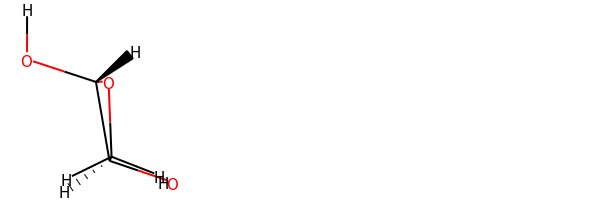

AlkEthOH_r0
     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    0.1466   -0.6972   -1.2190 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1072   -0.7754    0.3061 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.1521    0.7339    0.2375 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.0894    0.7465   -1.1920 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3221   -1.1878    0.9520 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4710    1.1671    0.6094 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.0701   -1.0576   -1.6805 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7173   -1.1199   -1.7408 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7451   -1.3515    0.6836 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6019    1.3396    0.7541 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.1323   -1.1855    1.8998 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4701    2.1287    0.5135 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  4  1  0
  2  3  1  0
  2  5  1  0
  3  4  1  0
  3  6  1  0
  1  7

In [2]:
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2"
ff_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/forcefield/smirnoff99Frosst.ffxml"
# mol_filename = "/home/shuzhe/Documents/openforcefield/openforcefield/data/molecules/MiniDrugBank_tripos.mol2"
mol = Chem.MolFromMol2File(mol_filename, sanitize = True, removeHs = False)
x = Draw.MolsToGridImage([mol])
display(x)

print Chem.MolToMolBlock(mol)
positions_rdk = extractPositionsFromRDKMol(mol)
#print positions

# atoms = mol.GetAtoms()
# print atoms[0].GetPropsAsDict()
# #print list(atoms[0].GetPropNames())
# atoms[0].SetDoubleProp("PartialCharge", 0.3)
# print atoms[0].GetPropsAsDict()["PartialCharge"]
# [float(a.GetPropsAsDict()["_TriposPartialCharge"]) if "_TriposPartialCharge" in a.GetPropsAsDict() else 0.0 for a in mol.GetAtoms()]

In [3]:

Chem.Draw.MolsToGridImage([mol],molsPerRow=1)


#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
#forcefield = ForceField('/home/shuzhe/Documents/openforcefield/openforcefield/data/forcefield/Frosst_AlkEtOH_parmAtFrosst.ffxml')

# Create the OpenMM system
topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(mol)
system_rdk = forcefield.createSystem(topology_rdk, [mol])

#g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology, topology, system, system, positions)

In [4]:
# mol_filename = '/home/shuzhe/Documents/openforcefield/examples/SMIRNOFF_simulation/AlkEthOH_r51.mol2'
# mol_filename = '/home/shuzhe/Documents/openforcefield/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2'

# Load molecule using OpenEye tools
mol = oechem.OEGraphMol()
ifs = oechem.oemolistream(mol_filename)
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
ifs.SetFlavor( oechem.OEFormat_MOL2, flavor)
oechem.OEReadMolecule(ifs, mol )
oechem.OETriposAtomNames(mol)

# Get positions in OpenMM-compatible format
positions_oe = extractPositionsFromOEMol(mol)
#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield.ForceField(ff_filename)
#forcefield = ForceField('/home/shuzhe/Documents/openforcefield/openforcefield/data/forcefield/Frosst_AlkEtOH_parmAtFrosst.ffxml')

# Create the OpenMM system
topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(mol)
system_oe = forcefield.createSystem(topology_oe, [mol])

g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, skip_assert = True)






Num (type) 	 Num (type) 	 Num (type) 	 Num (type) 	 per 	 phase 	 k0
  1 ( C2)-   0 ( C1)- 	 3 ( O1)- 	   2 ( C3)- 	 3.000000 	 0.000000 	 1.602472 
  1 ( C2)-   0 ( C1)- 	 3 ( O1)- 	   2 ( C3)- 	 2.000000 	 180.000000 	 0.418400 
  4 ( O2)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.602496 
  4 ( O2)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 2.000000 	 0.000000 	 4.916200 
  5 ( O3)-   2 ( C3)- 	 1 ( C2)- 	   8 ( H3)- 	 3.000000 	 0.000000 	 0.000000 
  5 ( O3)-   2 ( C3)- 	 1 ( C2)- 	   8 ( H3)- 	 1.000000 	 0.000000 	 1.046000 
  0 ( C1)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.652704 
  8 ( H3)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 3.000000 	 0.000000 	 0.697333 
  4 ( O2)-   1 ( C2)- 	 0 ( C1)- 	   6 ( H1)- 	 3.000000 	 0.000000 	 0.000000 
  4 ( O2)-   1 ( C2)- 	 0 ( C1)- 	   6 ( H1)- 	 1.000000 	 0.000000 	 1.046000 
  8 ( H3)-   1 ( C2)- 	 2 ( C3)- 	   9 ( H4)- 	 3.000000 	 0.000000 	 0.627600 
  2 ( C3)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 3

In [20]:
def compare_energies(rdkmol, oemol):
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol])
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol])

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
    for i in g1:
        print g1[i] == g2[i]
    print e1, e2
    print

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = "/home/shuzhe/Documents/zinc-subset-tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = False)
    compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    


False
True
True
True
47.4760940361 kJ/mol 47.4760935977 kJ/mol

False
False
True
False
318.212979114 kJ/mol 360.512982091 kJ/mol

False
False
True
False
342.477209002 kJ/mol 375.569082036 kJ/mol

False
True
True
True
341.63301521 kJ/mol 341.633013715 kJ/mol

False
False
False
False
480.902254653 kJ/mol 970.358719722 kJ/mol

False
True
True
False
-24.1012490004 kJ/mol -23.0920900099 kJ/mol

False
False
False
False
510.2014693 kJ/mol 603.701085459 kJ/mol

False
False
False
False
130.662952568 kJ/mol 159.54617481 kJ/mol

False
False
True
False
263.94605762 kJ/mol 317.807920523 kJ/mol

False
False
False
False
237.38386093 kJ/mol 301.158230089 kJ/mol

False
False
False
False
281.578835352 kJ/mol 310.642034574 kJ/mol

False
True
True
False
198.503469458 kJ/mol 199.085548844 kJ/mol

False
False
False
False
-294.498020882 kJ/mol -193.886683109 kJ/mol

False
False
True
False
-374.851329781 kJ/mol -271.340485158 kJ/mol

False
True
False
True
805.99832419 kJ/mol 829.616088214 kJ/mol

False
True
T

AttributeError: 'NoneType' object has no attribute 'GetNumAtoms'